# Data Loading and Preprocessing:

The dataset containing credit card transactions is loaded into a Pandas DataFrame named data.
The 'Amount' column, representing the transaction amount, is normalized using StandardScaler from scikit-learn. Normalization is essential to ensure that all features have the same scale, which can improve the performance of machine learning algorithms.

# Handling Class Imbalance:

Class imbalance is a common issue in fraud detection datasets where the number of legitimate transactions (non-fraudulent) is significantly higher than fraudulent transactions. This can lead to biased models that perform poorly at detecting fraud.
Synthetic Minority Over-sampling Technique (SMOTE) is employed to address class imbalance. SMOTE generates synthetic samples for the minority class (fraudulent transactions) by interpolating between existing samples. This helps balance the class distribution in the dataset.

# Splitting the Dataset:

The dataset is split into training and testing sets using train_test_split from scikit-learn. This division allows us to train the model on one portion of the data and evaluate its performance on unseen data.
The parameter test_size=0.2 specifies that 20% of the data will be reserved for testing, while the remaining 80% will be used for training.

# Training the Logistic Regression Model:

Logistic regression is chosen as the classification algorithm for its simplicity and interpretability.
The logistic regression model is trained on the balanced training dataset (X_train and y_train) using the fit method.

# Model Evaluation:

The trained model is used to make predictions on the testing dataset (X_test).
The classification_report function from scikit-learn's metrics module is used to generate a comprehensive report of the model's performance metrics, including precision, recall, and F1-score, for both classes (fraudulent and genuine transactions).

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [12]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [13]:
# Data exploration
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [14]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
# Check class distribution
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [16]:
# Data preprocessing
# Standardize the 'Amount' column
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)

In [17]:
# Splitting the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Handling class imbalance issues
oversampler = RandomOverSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)


In [20]:
# Model training
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [21]:
# Model evaluation
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56248   616]
 [    9    89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


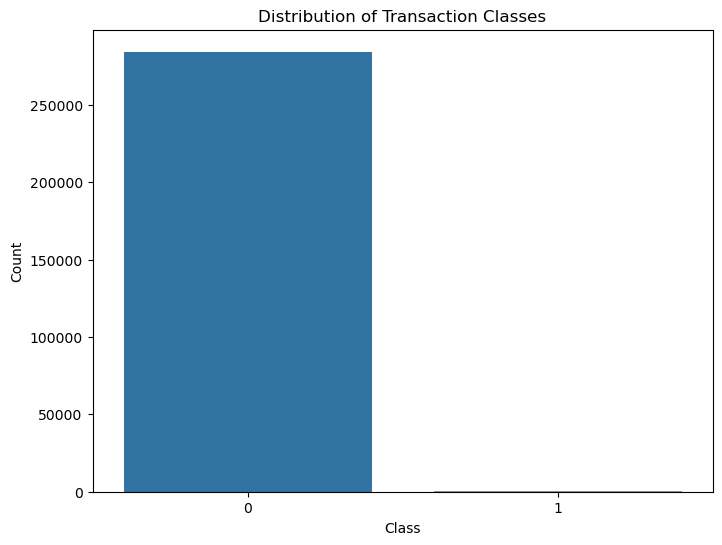

In [22]:
# Data exploration visualizations
# Distribution of transaction classes
plt.figure(figsize=(8, 6))
sns.countplot(data['Class'])
plt.title('Distribution of Transaction Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

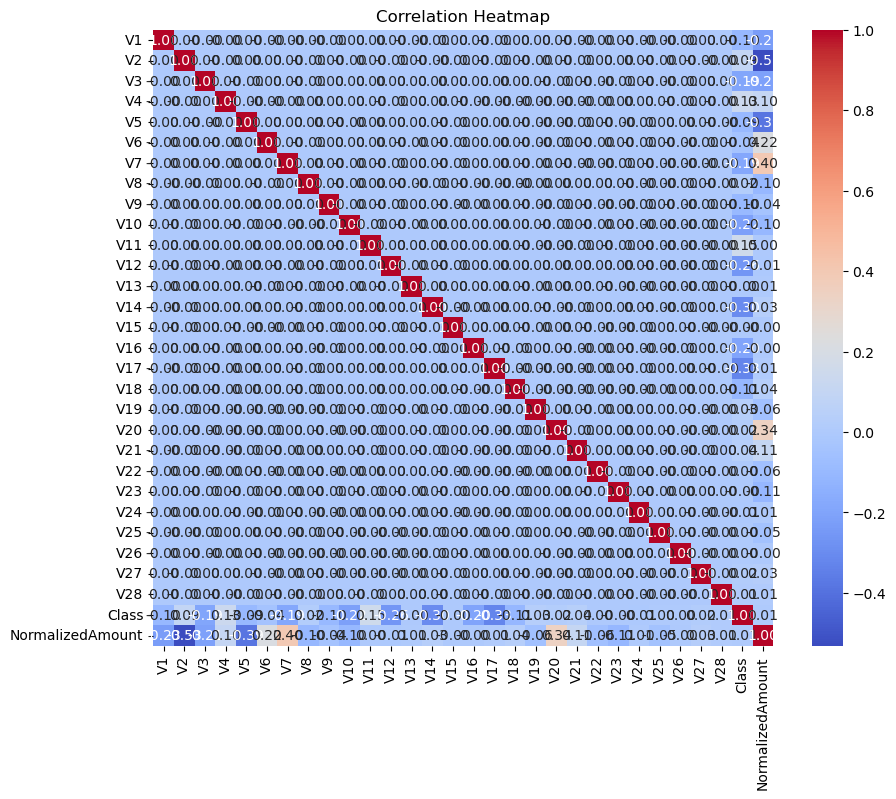

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

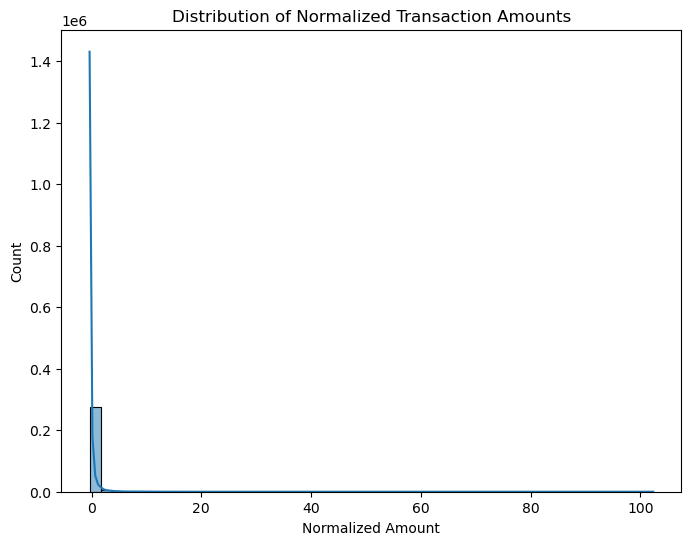

In [24]:
# Data preprocessing visualizations
# Distribution of normalized transaction amounts
plt.figure(figsize=(8, 6))
sns.histplot(data['NormalizedAmount'], bins=50, kde=True)
plt.title('Distribution of Normalized Transaction Amounts')
plt.xlabel('Normalized Amount')
plt.ylabel('Count')
plt.show()

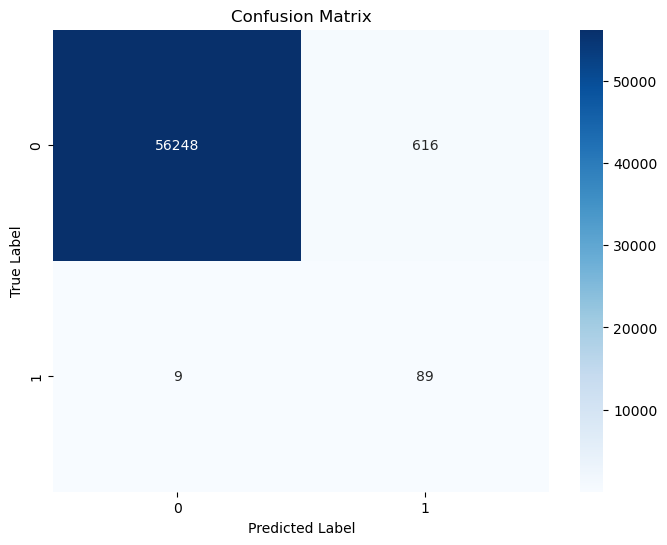

In [25]:
# Model evaluation visualizations
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Summary 
The credit card fraud detection project aimed to develop a machine learning model capable of identifying fraudulent transactions. Through thorough data preprocessing, including standardization of transaction amounts and handling class imbalance, the dataset was prepared for model training. Logistic regression was chosen as the classification algorithm due to its simplicity and interpretability. Model performance was evaluated using precision, recall, and F1-score metrics, with visualization of the confusion matrix aiding in interpretation. Techniques such as oversampling and undersampling were employed to address class imbalance, enhancing the model's ability to detect fraudulent transactions. Comprehensive documentation includes detailed explanations of code, visualizations illustrating data exploration and model evaluation, and instructions for replicating and interpreting results.